In [1]:
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor


from trading_envs import DiscreteTradingEnv, ContinuousTradingEnv
from logger import TrainingLoggerCallback
from data_and_plots import (
    generate_sine_wave,
    training_plot,
    results_plot,
    results_plot_continuous,
)
from helper import predict_data_env
import torch
import random

In [2]:
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Ziarno dla NumPy
np.random.seed(42)

# Ziarno dla standardowego generatora liczb losowych Pythona
random.seed(42)

In [3]:
prices = generate_sine_wave(seed=42)

Using cuda device
Wrapping the env in a DummyVecEnv.


c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 62.5     |
| time/              |          |
|    fps             | 474      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 400      |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 69.8        |
| time/                   |             |
|    fps                  | 453         |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 800         |
| train/                  |             |
|    approx_kl            | 0.012730311 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -5.9        |
|    learning_rate        | 0.

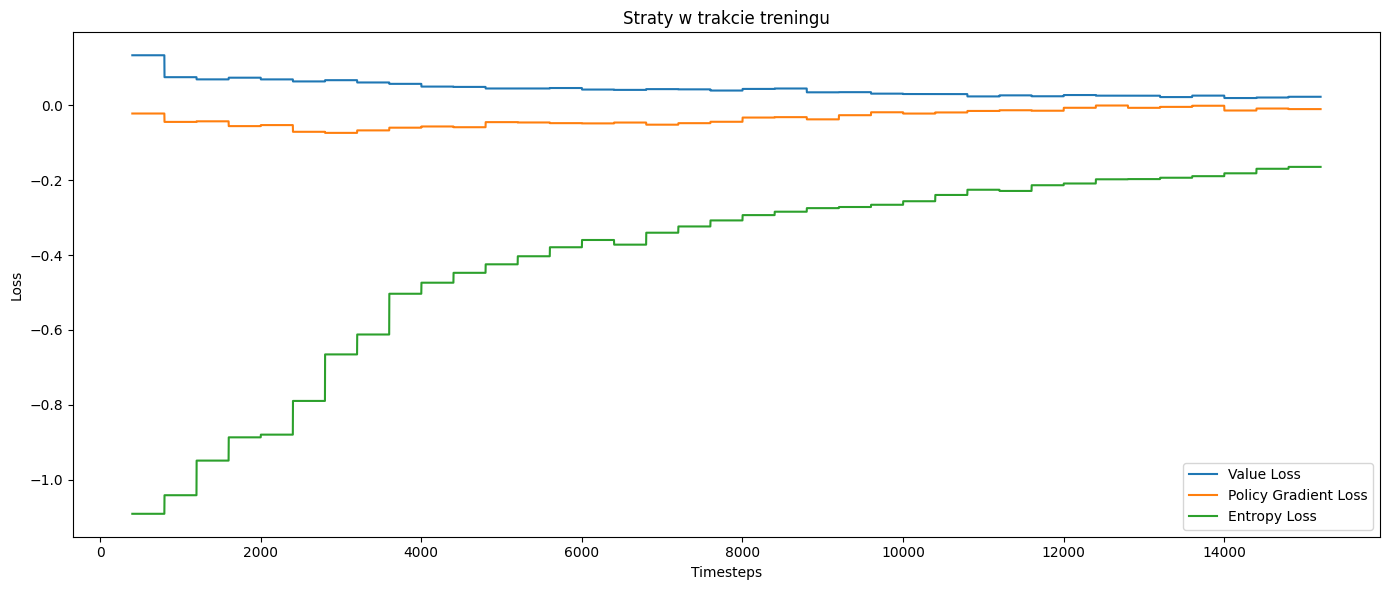

In [4]:
# Tworzenie instacji środowiska
env_agent = DiscreteTradingEnv(prices)
env_agent = Monitor(env_agent)

# Sprawdzenie zgodności środowiska z stable_baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # policy_kwargs=dict(
    #     net_arch=[
    #         128,
    #         128,
    #     ]
    # ),
    #   learning_rate=0.0005,        # domyślnie 3e-4
    n_steps=400,  # liczba kroków zanim agent zrobi aktualizację
    batch_size=100,  # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    gamma=0.3,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.8,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=15_000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

In [5]:
env_predict, lista = predict_data_env(
    env=DiscreteTradingEnv, data=prices, agent=model_agent
)

Krok: 1|Cena: 5.17|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 2|Cena: 5.39|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 3|Cena: 5.58|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 4|Cena: 5.71|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 5|Cena: 5.90|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 6|Cena: 6.11|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 7|Cena: 6.27|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 8|Cena: 6.45|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 9|Cena: 6.59|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 10|Cena: 6.78|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 11|Cena: 6.93|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 12|Cena: 7.06|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 13|Cena: 7.21|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 14|Cena: 7.33|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 15|Cena: 

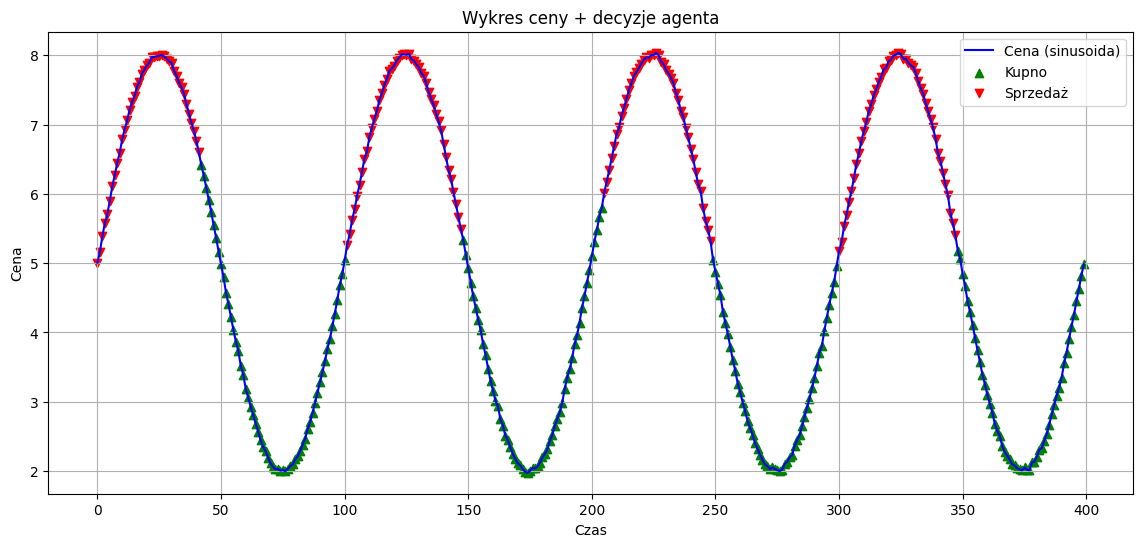

In [6]:
results_plot(env_predict=env_predict, prices=prices)

Using cuda device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 91.5     |
| time/              |          |
|    fps             | 596      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 400      |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 104         |
| time/                   |             |
|    fps                  | 606         |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 800         |
| train/                  |             |
|    approx_kl            | 0.008423535 |
|    clip_fraction        | 0.0402      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_vari

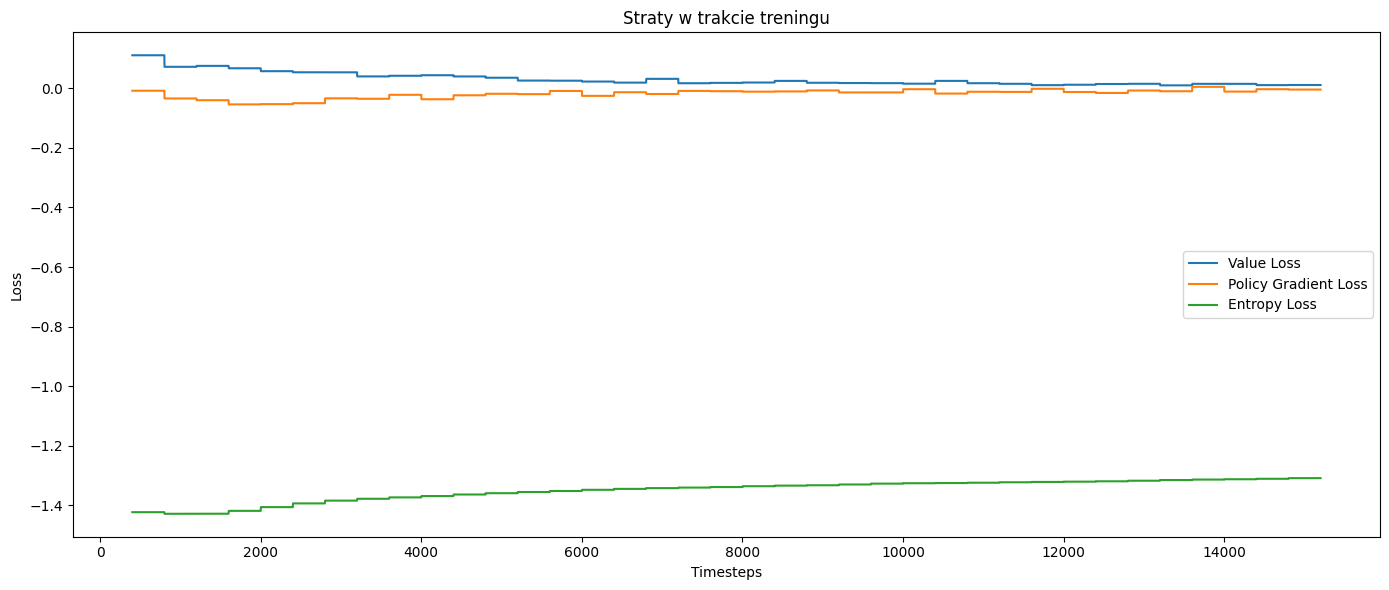

In [7]:
# Tworzenie instacji środowiska
env_agent = ContinuousTradingEnv(prices)
env_agent = Monitor(env_agent)

# Sprawdzenie zgodności środowiska z stable_baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # policy_kwargs=dict(
    #     net_arch=[
    #         128,
    #         128,
    #     ]
    # ),
    #   learning_rate=0.00005,        # domyślnie 3e-4
    n_steps=400,  # liczba kroków zanim agent zrobi aktualizację
    batch_size=100,  # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    gamma=0.3,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.2,                # zachęta do eksploracji
    verbose=1,
)
# Trening modelu
model_agent.learn(total_timesteps=15_000, callback=logger_callback)

training_plot(logger_callback=logger_callback)

In [8]:
env_predict, lista = predict_data_env(
    env=ContinuousTradingEnv, data=prices, agent=model_agent
)

Krok: 1|Cena: 5.17|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 2|Cena: 5.39|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 3|Cena: 5.58|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 4|Cena: 5.71|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 5|Cena: 5.90|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 6|Cena: 6.11|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 7|Cena: 6.27|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 8|Cena: 6.45|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 9|Cena: 6.59|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 10|Cena: 6.78|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 11|Cena: 6.93|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 12|Cena: 7.06|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 13|Cena: 7.21|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 14|Cena: 7.33|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|
Krok: 15|Cena: 

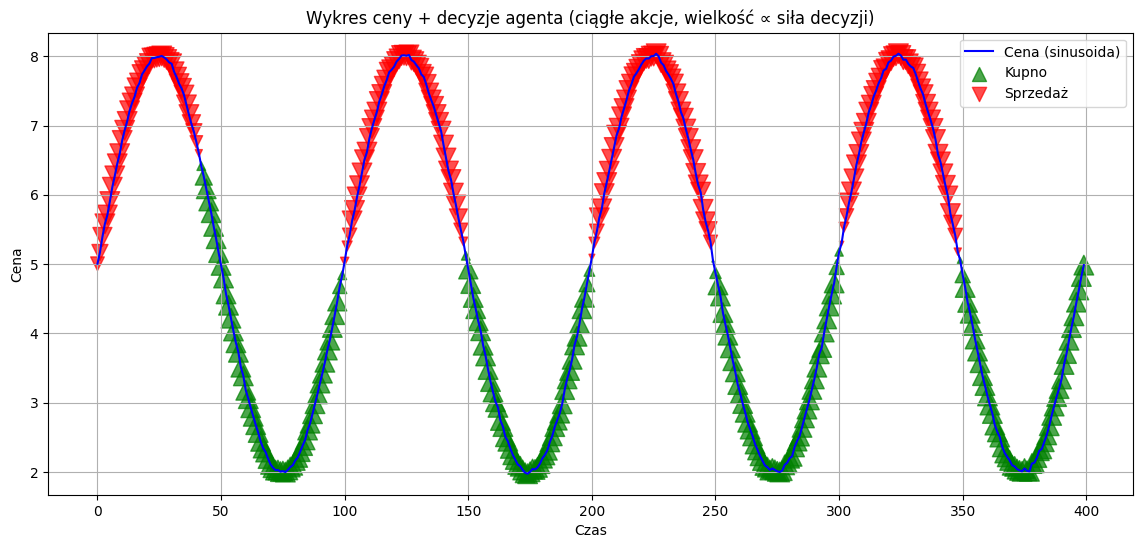

In [9]:
results_plot_continuous(env_predict=env_predict, prices=prices)